In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta #Blackbox AI used this at a later step

In [2]:
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
new_table = automap_base()
# reflect the tables
new_table.prepare(autoload_with=engine, reflect=True)

C:\Users\Grayson\AppData\Local\Temp\ipykernel_27488\4211124685.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  new_table.prepare(autoload_with=engine, reflect=True)


In [6]:
# View all of the classes that automap found
new_table.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
table_station = new_table.classes.station
table_measurements = new_table.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date_query = session.query(func.max(table_measurements.date)).scalar() #Thanks Blackbox 👍
print(latest_date_query)

2017-08-23


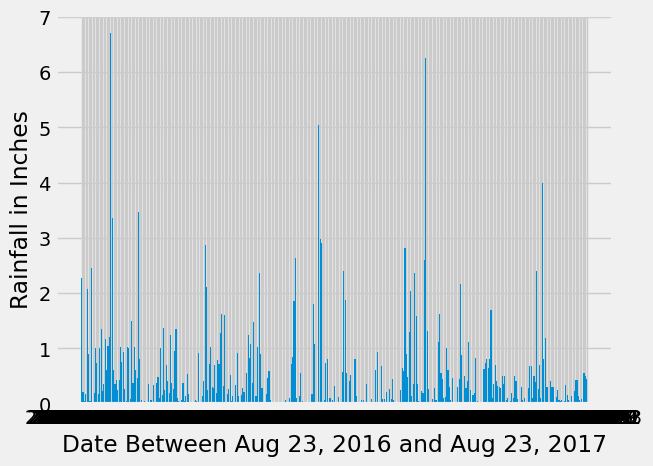

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = datetime.strptime(latest_date_query, '%Y-%m-%d')
start_date = latest_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
range_of_dates = session.query(table_measurements).filter(table_measurements.date.between(start_date, latest_date)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = [c.key for c in table_measurements.__table__.columns]

df = pd.DataFrame([{k: getattr(row, k) for k in column_names} for row in range_of_dates]) #Yet again, thank you Blackbox

# Sort the dataframe by date
df.sort_values(by='date', inplace=True)
df.head()
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df['date'], df['prcp'])
plt.xlabel('Date Between Aug 23, 2016 and Aug 23, 2017')
plt.ylabel('Rainfall in Inches')

df.sort_values(by='date', inplace=True)


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df[['prcp']].describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(table_measurements.station.distinct())).scalar() #Blackbox is really cool ngl
print(stations)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = df['station'].value_counts()
print(station_counts)

station
USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: count, dtype: int64


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = df[df['station'] == 'USC00519397']
print(f"The highest temperature of the most active station is {active_station['tobs'].max()}.")
print(f"The lowest temperature of the most active station is {active_station['tobs'].min()}.")
print(f"The average temperature of the most active station is {active_station['tobs'].mean()}.")

The highest temperature of the most active station is 87.0.
The lowest temperature of the most active station is 60.0.
The average temperature of the most active station is 75.19444444444444.


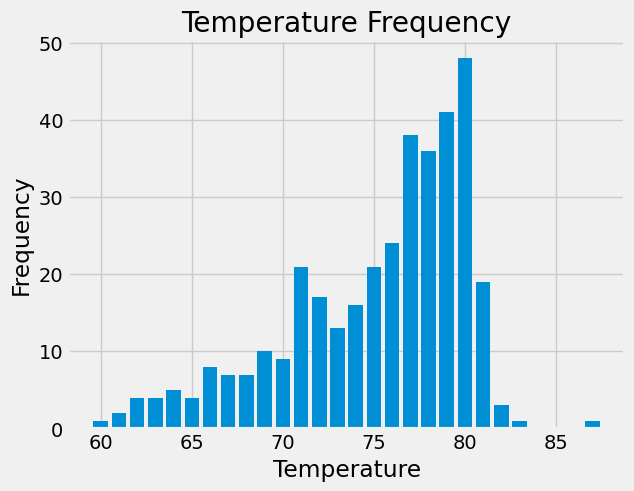

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
freq = active_station['tobs'].value_counts()

plt.bar(freq.index, freq.values)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()